In [1]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.4.1


In [17]:
NUM_WORDS = 1000

(train_data, train_labels), (test_data, test_labels) = keras.datasets.imdb.load_data(num_words=NUM_WORDS)

def multi_hot_sequences(sequences, dimension):
    # 0으로 채워진 (len(sequences), dimension) 크기의 행렬을 만듭니다
    results = np.zeros((len(sequences), dimension))
    for i, word_indices in enumerate(sequences):
        results[i, word_indices] = 1.0  # results[i]의 특정 인덱스만 1로 설정합니다
    return results


train_data = multi_hot_sequences(train_data, dimension=NUM_WORDS)
test_data = multi_hot_sequences(test_data, dimension=NUM_WORDS)

<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
c:\users\overthinking\appdata\local\programs\python\python36\lib\site-packages\tensorflow\python\keras\datasets\imdb.py:159: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
c:\users\overthinking\appdata\local\programs\python\python36\lib\site-packages\tensorflow\python\keras\datasets\imdb.py:160: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with differ

(25000, 1000)
(25000, 1000)


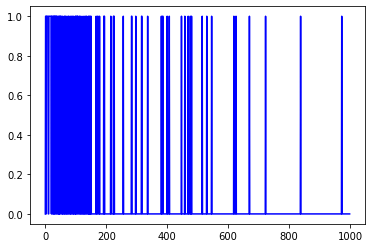

In [16]:
plt.plot(train_data[0],'b-')

In [18]:
baseline_model = keras.Sequential([
    # `.summary` 메서드 때문에 `input_shape`가 필요합니다
    keras.layers.Dense(16, activation='relu', input_shape=(NUM_WORDS,)),
    keras.layers.Dense(16, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

baseline_model.compile(optimizer='adam',
                       loss='binary_crossentropy',
                       metrics=['accuracy', 'binary_crossentropy'])

baseline_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                16016     
_________________________________________________________________
dense_1 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 17        
Total params: 16,305
Trainable params: 16,305
Non-trainable params: 0
_________________________________________________________________


In [19]:
baseline_history = baseline_model.fit(train_data,
                                      train_labels,
                                      epochs=20,
                                      batch_size=512,
                                      validation_data=(test_data, test_labels),
                                      verbose=2)

Epoch 1/20
49/49 - 1s - loss: 0.5877 - accuracy: 0.7104 - binary_crossentropy: 0.5877 - val_loss: 0.4406 - val_accuracy: 0.8205 - val_binary_crossentropy: 0.4406
Epoch 2/20
49/49 - 0s - loss: 0.3736 - accuracy: 0.8466 - binary_crossentropy: 0.3736 - val_loss: 0.3460 - val_accuracy: 0.8549 - val_binary_crossentropy: 0.3460
Epoch 3/20
49/49 - 0s - loss: 0.3235 - accuracy: 0.8654 - binary_crossentropy: 0.3235 - val_loss: 0.3354 - val_accuracy: 0.8574 - val_binary_crossentropy: 0.3354
Epoch 4/20
49/49 - 0s - loss: 0.3088 - accuracy: 0.8714 - binary_crossentropy: 0.3088 - val_loss: 0.3288 - val_accuracy: 0.8610 - val_binary_crossentropy: 0.3288
Epoch 5/20
49/49 - 0s - loss: 0.3018 - accuracy: 0.8743 - binary_crossentropy: 0.3018 - val_loss: 0.3279 - val_accuracy: 0.8609 - val_binary_crossentropy: 0.3279
Epoch 6/20
49/49 - 0s - loss: 0.2970 - accuracy: 0.8777 - binary_crossentropy: 0.2970 - val_loss: 0.3281 - val_accuracy: 0.8608 - val_binary_crossentropy: 0.3281
Epoch 7/20
49/49 - 0s - loss

In [20]:
smaller_model = keras.Sequential([
    keras.layers.Dense(4, activation='relu', input_shape=(NUM_WORDS,)),
    keras.layers.Dense(4, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

smaller_model.compile(optimizer='adam',
                      loss='binary_crossentropy',
                      metrics=['accuracy', 'binary_crossentropy'])

smaller_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 4)                 4004      
_________________________________________________________________
dense_4 (Dense)              (None, 4)                 20        
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 5         
Total params: 4,029
Trainable params: 4,029
Non-trainable params: 0
_________________________________________________________________


In [21]:
smaller_history = smaller_model.fit(train_data,
                                    train_labels,
                                    epochs=20,
                                    batch_size=512,
                                    validation_data=(test_data, test_labels),
                                    verbose=2)

Epoch 1/20
49/49 - 1s - loss: 0.6238 - accuracy: 0.6396 - binary_crossentropy: 0.6238 - val_loss: 0.4903 - val_accuracy: 0.7849 - val_binary_crossentropy: 0.4903
Epoch 2/20
49/49 - 0s - loss: 0.4140 - accuracy: 0.8259 - binary_crossentropy: 0.4140 - val_loss: 0.3762 - val_accuracy: 0.8428 - val_binary_crossentropy: 0.3762
Epoch 3/20
49/49 - 0s - loss: 0.3447 - accuracy: 0.8584 - binary_crossentropy: 0.3447 - val_loss: 0.3422 - val_accuracy: 0.8554 - val_binary_crossentropy: 0.3422
Epoch 4/20
49/49 - 0s - loss: 0.3202 - accuracy: 0.8679 - binary_crossentropy: 0.3202 - val_loss: 0.3316 - val_accuracy: 0.8594 - val_binary_crossentropy: 0.3316
Epoch 5/20
49/49 - 0s - loss: 0.3101 - accuracy: 0.8720 - binary_crossentropy: 0.3101 - val_loss: 0.3310 - val_accuracy: 0.8601 - val_binary_crossentropy: 0.3310
Epoch 6/20
49/49 - 0s - loss: 0.3042 - accuracy: 0.8747 - binary_crossentropy: 0.3042 - val_loss: 0.3282 - val_accuracy: 0.8599 - val_binary_crossentropy: 0.3282
Epoch 7/20
49/49 - 0s - loss

In [22]:
bigger_model = keras.models.Sequential([
    keras.layers.Dense(512, activation='relu', input_shape=(NUM_WORDS,)),
    keras.layers.Dense(512, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

bigger_model.compile(optimizer='adam',
                     loss='binary_crossentropy',
                     metrics=['accuracy','binary_crossentropy'])

bigger_model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 512)               512512    
_________________________________________________________________
dense_7 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 513       
Total params: 775,681
Trainable params: 775,681
Non-trainable params: 0
_________________________________________________________________


In [23]:
bigger_history = bigger_model.fit(train_data, train_labels,
                                  epochs=20,
                                  batch_size=512,
                                  validation_data=(test_data, test_labels),
                                  verbose=2)

Epoch 1/20
49/49 - 1s - loss: 0.4587 - accuracy: 0.7765 - binary_crossentropy: 0.4587 - val_loss: 0.3356 - val_accuracy: 0.8579 - val_binary_crossentropy: 0.3356
Epoch 2/20
49/49 - 1s - loss: 0.2934 - accuracy: 0.8780 - binary_crossentropy: 0.2934 - val_loss: 0.3258 - val_accuracy: 0.8590 - val_binary_crossentropy: 0.3258
Epoch 3/20
49/49 - 1s - loss: 0.2344 - accuracy: 0.9068 - binary_crossentropy: 0.2344 - val_loss: 0.3380 - val_accuracy: 0.8574 - val_binary_crossentropy: 0.3380
Epoch 4/20
49/49 - 1s - loss: 0.1278 - accuracy: 0.9578 - binary_crossentropy: 0.1278 - val_loss: 0.3992 - val_accuracy: 0.8491 - val_binary_crossentropy: 0.3992
Epoch 5/20
49/49 - 1s - loss: 0.0309 - accuracy: 0.9945 - binary_crossentropy: 0.0309 - val_loss: 0.5036 - val_accuracy: 0.8504 - val_binary_crossentropy: 0.5036
Epoch 6/20
49/49 - 1s - loss: 0.0061 - accuracy: 0.9998 - binary_crossentropy: 0.0061 - val_loss: 0.5737 - val_accuracy: 0.8519 - val_binary_crossentropy: 0.5737
Epoch 7/20
49/49 - 1s - loss

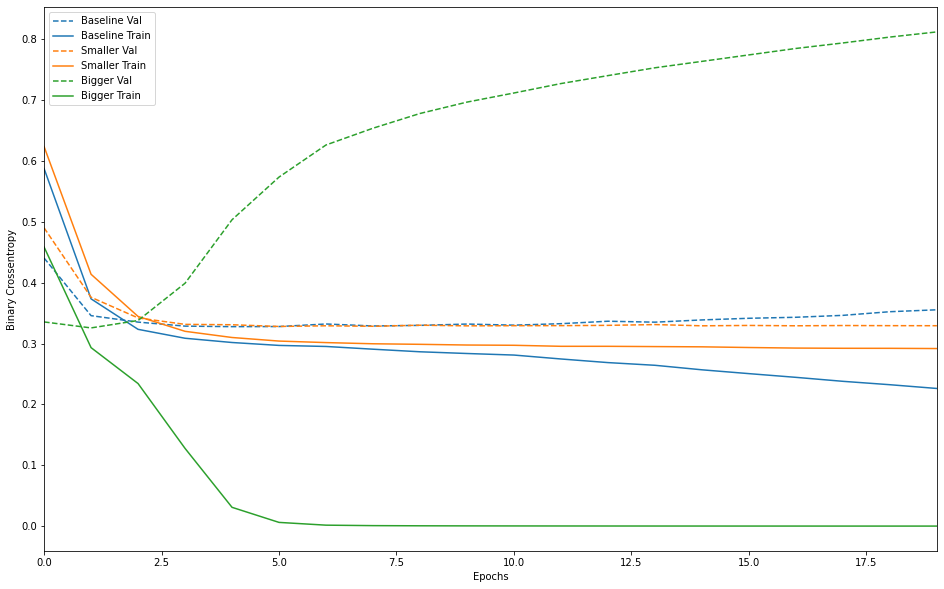

In [24]:
def plot_history(histories, key='binary_crossentropy'):
  plt.figure(figsize=(16,10))

  for name, history in histories:
    val = plt.plot(history.epoch, history.history['val_'+key],
                   '--', label=name.title()+' Val')
    plt.plot(history.epoch, history.history[key], color=val[0].get_color(),
             label=name.title()+' Train')

  plt.xlabel('Epochs')
  plt.ylabel(key.replace('_',' ').title())
  plt.legend()

  plt.xlim([0,max(history.epoch)])


plot_history([('baseline', baseline_history),
              ('smaller', smaller_history),
              ('bigger', bigger_history)])

In [25]:
l2_model = keras.models.Sequential([
    keras.layers.Dense(16, kernel_regularizer=keras.regularizers.l2(0.001),
                       activation='relu', input_shape=(NUM_WORDS,)),
    keras.layers.Dense(16, kernel_regularizer=keras.regularizers.l2(0.001),
                       activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

l2_model.compile(optimizer='adam',
                 loss='binary_crossentropy',
                 metrics=['accuracy', 'binary_crossentropy'])

l2_model_history = l2_model.fit(train_data, train_labels,
                                epochs=20,
                                batch_size=512,
                                validation_data=(test_data, test_labels),
                                verbose=2)

Epoch 1/20
49/49 - 1s - loss: 0.6830 - accuracy: 0.6198 - binary_crossentropy: 0.6411 - val_loss: 0.5661 - val_accuracy: 0.7919 - val_binary_crossentropy: 0.5286
Epoch 2/20
49/49 - 0s - loss: 0.4624 - accuracy: 0.8300 - binary_crossentropy: 0.4260 - val_loss: 0.3984 - val_accuracy: 0.8509 - val_binary_crossentropy: 0.3626
Epoch 3/20
49/49 - 0s - loss: 0.3699 - accuracy: 0.8617 - binary_crossentropy: 0.3346 - val_loss: 0.3683 - val_accuracy: 0.8588 - val_binary_crossentropy: 0.3338
Epoch 4/20
49/49 - 0s - loss: 0.3474 - accuracy: 0.8704 - binary_crossentropy: 0.3136 - val_loss: 0.3609 - val_accuracy: 0.8609 - val_binary_crossentropy: 0.3280
Epoch 5/20
49/49 - 0s - loss: 0.3389 - accuracy: 0.8733 - binary_crossentropy: 0.3067 - val_loss: 0.3580 - val_accuracy: 0.8608 - val_binary_crossentropy: 0.3265
Epoch 6/20
49/49 - 0s - loss: 0.3342 - accuracy: 0.8750 - binary_crossentropy: 0.3033 - val_loss: 0.3567 - val_accuracy: 0.8607 - val_binary_crossentropy: 0.3266
Epoch 7/20
49/49 - 0s - loss

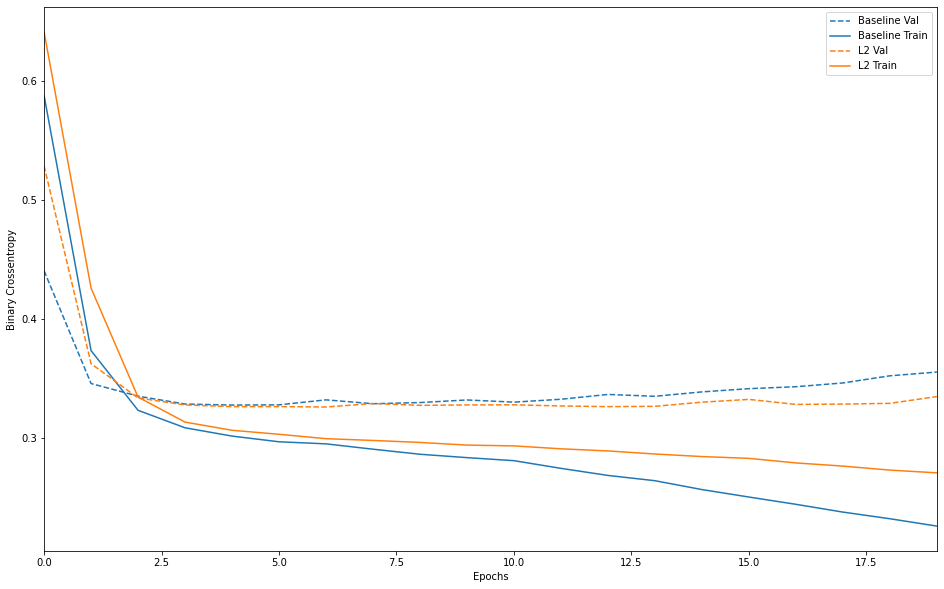

In [26]:
plot_history([('baseline', baseline_history),
              ('l2', l2_model_history)])

In [27]:
dpt_model = keras.models.Sequential([
    keras.layers.Dense(16, activation='relu', input_shape=(NUM_WORDS,)),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(16, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(1, activation='sigmoid')
])

dpt_model.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy','binary_crossentropy'])

dpt_model_history = dpt_model.fit(train_data, train_labels,
                                  epochs=20,
                                  batch_size=512,
                                  validation_data=(test_data, test_labels),
                                  verbose=2)

Epoch 1/20
49/49 - 1s - loss: 0.6815 - accuracy: 0.5537 - binary_crossentropy: 0.6815 - val_loss: 0.6272 - val_accuracy: 0.7423 - val_binary_crossentropy: 0.6272
Epoch 2/20
49/49 - 0s - loss: 0.6017 - accuracy: 0.6784 - binary_crossentropy: 0.6017 - val_loss: 0.4805 - val_accuracy: 0.8165 - val_binary_crossentropy: 0.4805
Epoch 3/20
49/49 - 0s - loss: 0.5010 - accuracy: 0.7736 - binary_crossentropy: 0.5010 - val_loss: 0.3871 - val_accuracy: 0.8453 - val_binary_crossentropy: 0.3871
Epoch 4/20
49/49 - 0s - loss: 0.4349 - accuracy: 0.8151 - binary_crossentropy: 0.4349 - val_loss: 0.3481 - val_accuracy: 0.8532 - val_binary_crossentropy: 0.3481
Epoch 5/20
49/49 - 0s - loss: 0.4062 - accuracy: 0.8354 - binary_crossentropy: 0.4062 - val_loss: 0.3333 - val_accuracy: 0.8573 - val_binary_crossentropy: 0.3333
Epoch 6/20
49/49 - 0s - loss: 0.3805 - accuracy: 0.8476 - binary_crossentropy: 0.3805 - val_loss: 0.3269 - val_accuracy: 0.8586 - val_binary_crossentropy: 0.3269
Epoch 7/20
49/49 - 0s - loss

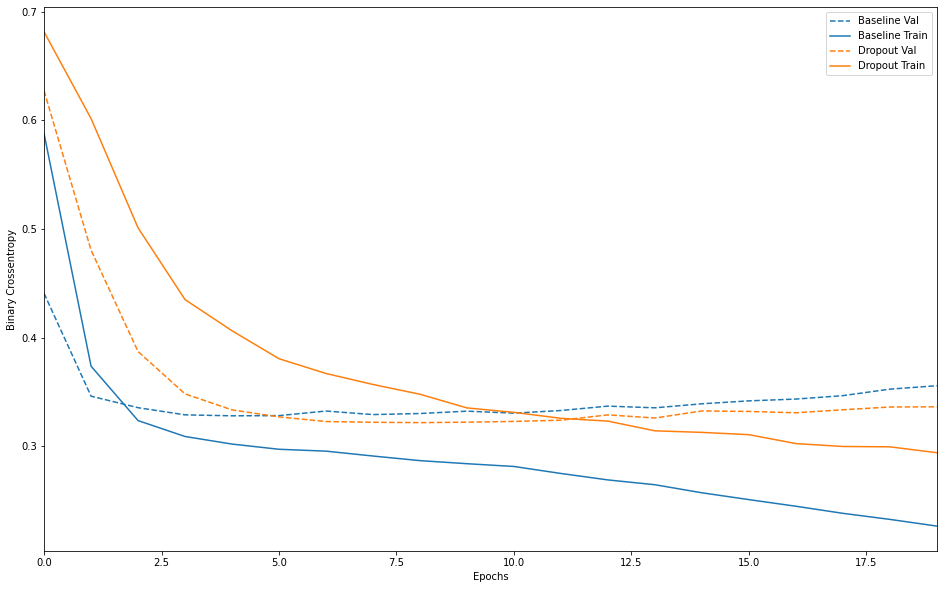

In [28]:
plot_history([('baseline', baseline_history),
              ('dropout', dpt_model_history)])